## ARIMA Walkthrough

Load the data and plot it.  Note that to make the index a time object in python

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\a0875458\\Documents\\My Data\\IDP\\Masters\\Sem 6 - 09 - 7333 - Quantifying The World\\Week 8\\QTW_Week_8'

In [3]:
dff = read_csv('ILINet.csv',sep=',',header=1)
dff.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


In [4]:
dff.tail()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1215,National,X,2021,2,1.29767,1.26578,2359,6347,X,4016,3494,2807,19023,3262,1502865
1216,National,X,2021,3,1.25421,1.21232,2545,5836,X,4006,3268,2523,18178,3279,1499438
1217,National,X,2021,4,1.10470,1.12468,2538,5303,X,3875,2774,2211,16701,3276,1484955
1218,National,X,2021,5,1.19874,1.09873,2604,4932,X,3928,2476,1886,15826,3200,1440389
1219,National,X,2021,6,1.14652,1.00602,2402,3954,X,3465,2026,1471,13318,2928,1323826


In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 15 columns):
REGION TYPE          1220 non-null object
REGION               1220 non-null object
YEAR                 1220 non-null int64
WEEK                 1220 non-null int64
% WEIGHTED ILI       1220 non-null float64
%UNWEIGHTED ILI      1220 non-null float64
AGE 0-4              1220 non-null int64
AGE 25-49            1220 non-null object
AGE 25-64            1220 non-null object
AGE 5-24             1220 non-null int64
AGE 50-64            1220 non-null object
AGE 65               1220 non-null int64
ILITOTAL             1220 non-null int64
NUM. OF PROVIDERS    1220 non-null int64
TOTAL PATIENTS       1220 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 143.0+ KB


## Train & Test Dataset Creation

In [6]:
print("Total number of datapoints in the original timeseries: " + str(dff.shape[0]))

Total number of datapoints in the original timeseries: 1220


In [7]:
trainDataSplit  = 0.9
trainDataPoints = int(dff.shape[0] * trainDataSplit)
dft = dff.iloc[0:trainDataPoints, ]
print("Total number of datapoints in the train timeseries: " + str(dft.shape[0]))
dft.head()

Total number of datapoints in the train timeseries: 1098


,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


In [8]:
dfv = dff.iloc[trainDataPoints:len(dff), ]
print("Total number of datapoints in the test timeseries: " + str(dfv.shape[0]))
dfv.tail()

Total number of datapoints in the test timeseries: 122


,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1215,National,X,2021,2,1.29767,1.26578,2359,6347,X,4016,3494,2807,19023,3262,1502865
1216,National,X,2021,3,1.25421,1.21232,2545,5836,X,4006,3268,2523,18178,3279,1499438
1217,National,X,2021,4,1.10470,1.12468,2538,5303,X,3875,2774,2211,16701,3276,1484955
1218,National,X,2021,5,1.19874,1.09873,2604,4932,X,3928,2476,1886,15826,3200,1440389
1219,National,X,2021,6,1.14652,1.00602,2402,3954,X,3465,2026,1471,13318,2928,1323826


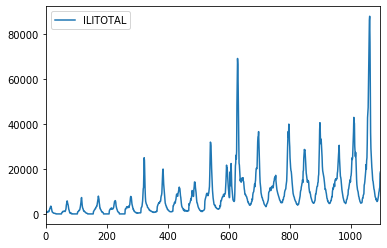

In [9]:
dft.plot.line(y='ILITOTAL')

## Datetime Object Modeling

In [10]:
fluDatat=dft['ILITOTAL']
fluDatat.index = pd.to_datetime(dft.YEAR.astype(str), format='%Y') + pd.to_timedelta(dft.WEEK.mul(7).astype(str) + ' days')
fluDatat.head()

1997-10-08    570
1997-10-15    615
1997-10-22    681
1997-10-29    653
1997-11-05    700
Name: ILITOTAL, dtype: int64

In [11]:
fluDatav=dfv['ILITOTAL']
fluDatav.index = pd.to_datetime(dfv.YEAR.astype(str), format='%Y') + pd.to_timedelta(dfv.WEEK.mul(7).astype(str) + ' days')
fluDatav.tail()

2021-01-15    19023
2021-01-22    18178
2021-01-29    16701
2021-02-05    15826
2021-02-12    13318
Name: ILITOTAL, dtype: int64

In [12]:
# import altair as alt

# dff['YEAR'] = dff['YEAR'].astype(str)
# # dff['WEEK'] = dff['WEEK'].astype(str)

# alt.Chart(dff).mark_line().encode(
#     x='WEEK',
#     y='TOTAL PATIENTS',
#     color='YEAR',
#     tooltip = ['YEAR', 'WEEK', 'TOTAL PATIENTS']
# ).interactive().properties(
#     width = 700,
#     height = 400,
#     title = 'Total Patients vs Week Number over the years'
# )

In [13]:
# alt.Chart(dff).mark_line().encode(
#     x='WEEK',
#     y='ILITOTAL',
#     color='YEAR',
#     tooltip = ['YEAR', 'WEEK', 'TOTAL PATIENTS']
# ).interactive().properties(
#     width = 700,
#     height = 400,
#     title = 'ILI Patients vs Week Number over the years'
# )

This is just a function that implements the Dickey-Fuller test and plots data along with rolling mean and standard deviation

## Function definitions

#### Test for stationarity  

  * Added lag_range to compute rolling statistics for different datasets

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,lag_range):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(lag_range).mean()
    rolstd = timeseries.rolling(lag_range).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


## Original Series : test for stationarity

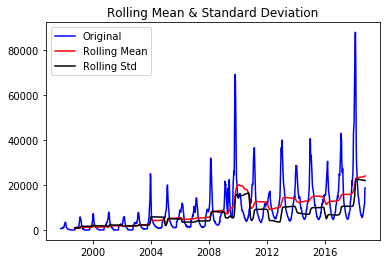

Results of Dickey-Fuller Test:
Test Statistic                -5.990891e+00
p-value                        1.746763e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.086000e+03
Critical Value (1%)           -3.436386e+00
Critical Value (5%)           -2.864205e+00
Critical Value (10%)          -2.568189e+00
dtype: float64


In [15]:
test_stationarity(fluDatat,52)

#### Stationarity Test Summary

* Above DF test results indicate that the result is significant, and we reject the NULL, at 1% critical value = -3.43, and  Test Statistic = -5.991

* The results suggest waveform is stationary.

### Subtracting Trend : Does Confidence in Stationarity improve ?

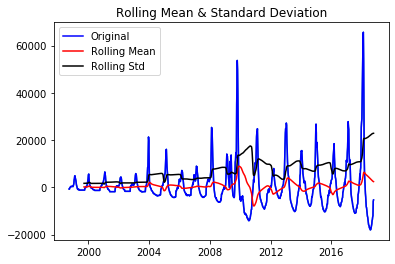

Results of Dickey-Fuller Test:
Test Statistic                -9.168327e+00
p-value                        2.426410e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.024000e+03
Critical Value (1%)           -3.436752e+00
Critical Value (5%)           -2.864367e+00
Critical Value (10%)          -2.568275e+00
dtype: float64


In [16]:
moving_avg_dft = fluDatat.rolling(52).mean()
no_trend_dft = fluDatat - moving_avg_dft
plt.plot(no_trend_dft)
plt.title("Flu Data with Rolling Mean Removed")
test_stationarity(no_trend_dft.dropna(),52)

#### Stationarity Test Summary (after removing trend)

* Above DF test results indicate that the result is significant, and we reject the NULL, with 1% critical value = -3.43, and  Test Statistic = -9.168

* The results suggest waveform is stationary.

**Removal of trend increases confidence in stationarity, with test statistic being now -9.168, as compared to original data at -5.991.**

## Review of Seasonality & Differencing

### Decomposing the original time series

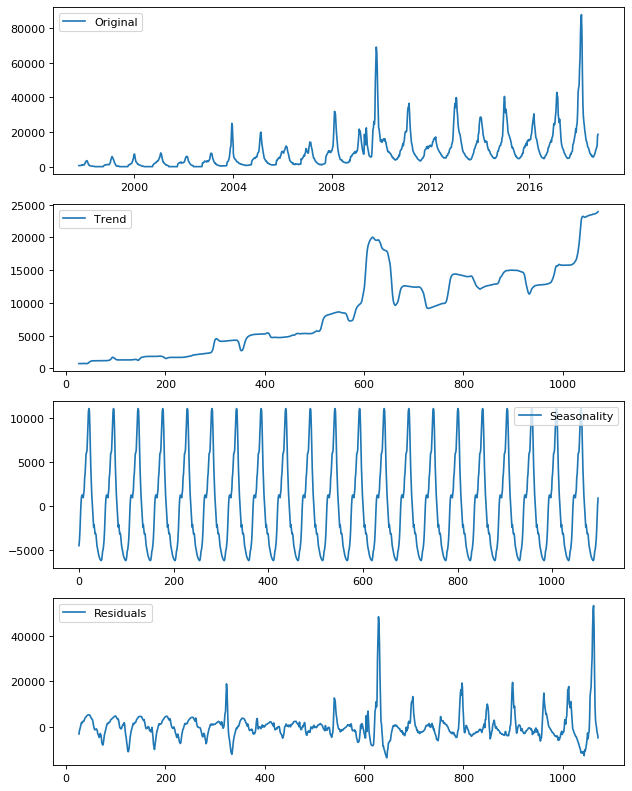

In [17]:
# Decomposing and extracting seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(fluDatat.values,freq=52)

trend_dft_d0 = decomposition.trend
seasonal_dft_d0 = decomposition.seasonal
residual_dft_d0 = decomposition.resid
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(411)
plt.plot(fluDatat, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_dft_d0, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_dft_d0,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_dft_d0, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Reviewing Differencing of 1

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
flu_pop = fluDatat
diff_flu_pop = flu_pop-flu_pop.shift(1) # Changing the shift value is equivalent to changing your 'd' value
decomposition = seasonal_decompose(diff_flu_pop.dropna().values,freq=52)

trend_dft_d1 = decomposition.trend
seasonal_dft_d1 = decomposition.seasonal
residual_dft_d1 = decomposition.resid

### Differencing & Seasonality

#### Plots

Text(0.5, 1.0, 'Impact of 1st order difference on Seasonality')

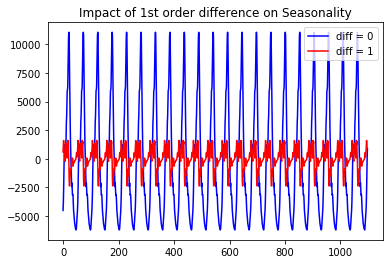

In [19]:
plt.plot(seasonal_dft_d0,label='diff = 0', color = 'blue')
plt.plot(seasonal_dft_d1,label='diff = 1', color = 'red')
plt.legend(loc='best')
plt.title('Impact of 1st order difference on Seasonality')

#### Summary 

  * Seasonality component has reduced by 4x - 5x.

  * Using differenced time series might get us a good model

### Differencing & Residuals

#### Plots

Text(0.5, 1.0, 'Impact of 1st order difference on Residuals')

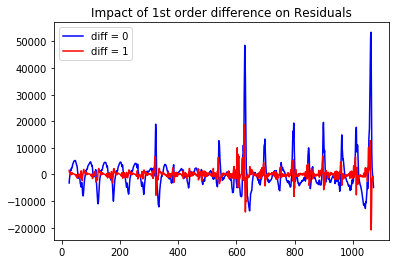

In [20]:
plt.plot(residual_dft_d0,label='diff = 0', color = 'blue')
plt.plot(residual_dft_d1,label='diff = 1', color = 'red')
plt.legend(loc='best')
plt.title('Impact of 1st order difference on Residuals')

#### Summary

  * Residual component has reduced significantly.

  * Using differenced time series might get us a good model

### Differencing & Stationarity

#### Plots

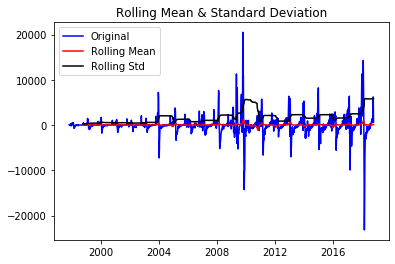

Results of Dickey-Fuller Test:
Test Statistic                -1.239476e+01
p-value                        4.702162e-23
#Lags Used                     8.000000e+00
Number of Observations Used    1.088000e+03
Critical Value (1%)           -3.436375e+00
Critical Value (5%)           -2.864200e+00
Critical Value (10%)          -2.568186e+00
dtype: float64


In [21]:
test_stationarity(diff_flu_pop.dropna(),52)

#### Summary : 

* Original (diff 0) : Test statistic = -5.99
* Differenced (1)   : Test statistic = -12.39
* Critical Value(1%): -3.43

**Differencing improves our confidence in stationarity as well, as the test statistic is more extreme with respect to original**

### Summary on Differencing
* Reduces seasonality
* Reduces residues
* Improves stationarity

**It is recommended to use difference = 1, but is it necessdary ? We will validate later if it improves model score**

## ACF & PACF (Original Series)

Text(0.5, 1.0, 'Autocorrelation Function (Not Differenced)')

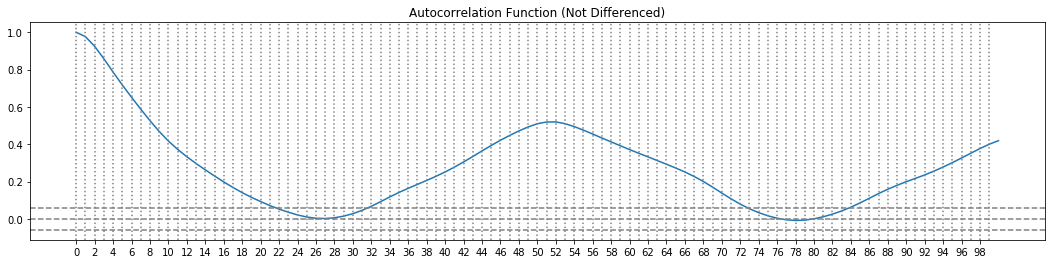

In [22]:
from statsmodels.tsa.stattools import acf, pacf
acf_flu_plot = acf(fluDatat, nlags=100, fft=True)
#Plot ACF: 
plt.figure(figsize=(40, 4))

plt.subplot(121) 
plt.plot(acf_flu_plot)
plt.xticks(np.arange(0,100,2))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(fluDatat)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(fluDatat)),linestyle='--',color='gray')
for i in range(0,100,1):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Autocorrelation Function (Not Differenced)')

Text(0.5, 1.0, 'Partial Autocorrelation Function (Not Differenced)')

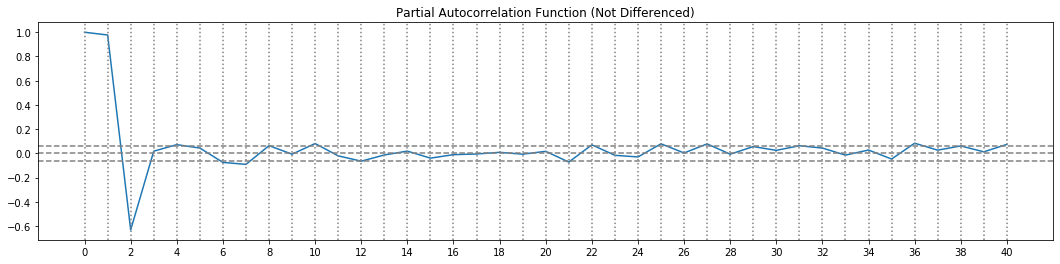

In [23]:
pacf_flu_plot = pacf(fluDatat.dropna(), nlags=40)
#Plot ACF: 
plt.figure(figsize=(40, 4))

plt.subplot(121) 
plt.plot(pacf_flu_plot)
plt.xticks(np.arange(0,41,2))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(fluDatat)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(fluDatat)),linestyle='--',color='gray')
for i in range(0,41,1):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Partial Autocorrelation Function (Not Differenced)')

### Summary (Original Series)

https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8

* ACF slowly reducing.
* PACF quickly drops at lag=2, and becomes negative. 

**The series likely has a lag(2) AR component, i.e. p = 2 is supported.**

## ACF & PACF (Difference = 1)

Text(0.5, 1.0, 'Autocorrelation Function (Difference = 1)')

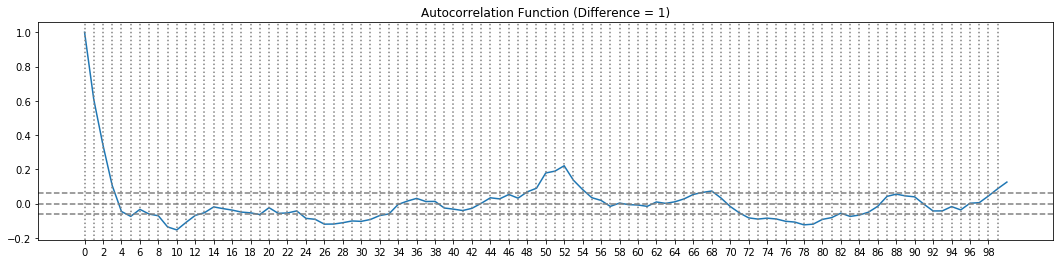

In [24]:
from statsmodels.tsa.stattools import acf, pacf
acf_diff_flu_plot = acf(diff_flu_pop.dropna(), nlags=100, fft=True)
#Plot ACF: 
plt.figure(figsize=(40, 4))

plt.subplot(121) 
plt.plot(acf_diff_flu_plot)
plt.xticks(np.arange(0,100,2))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_flu_pop)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_flu_pop)),linestyle='--',color='gray')
for i in range(0,100,1):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Autocorrelation Function (Difference = 1)')

Text(0.5, 1.0, 'Partial Autocorrelation Function (Difference = 1)')

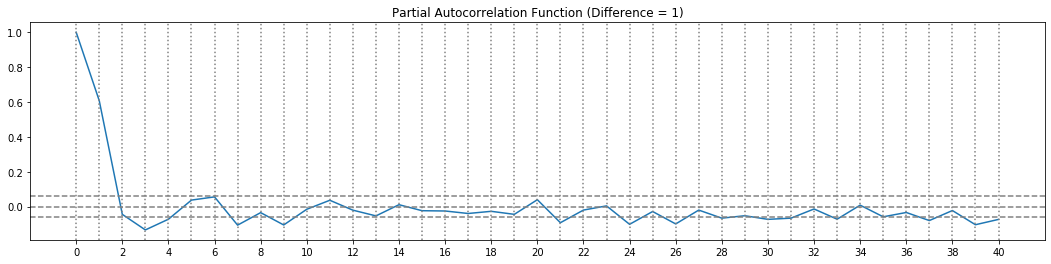

In [25]:
pacf_diff_flu_plot = pacf(diff_flu_pop.dropna(), nlags=40)
#Plot ACF: 
plt.figure(figsize=(40, 4))

plt.subplot(121) 
plt.plot(pacf_diff_flu_plot)
plt.xticks(np.arange(0,41,2))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_flu_pop)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_flu_pop)),linestyle='--',color='gray')
for i in range(0,41,1):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Partial Autocorrelation Function (Difference = 1)')

### Summary (Differenced by 1)

https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8

* ACF reducing much faster than original original series
* PACF quickly drops at lag=2, and becomes slightly negative.

**The series likely has a lag(2) AR component, i.e. p = 2 is supported.**

## Time Series Exploration Summary

#### Original Series

* Is stationary, per DF test
* Has a strong seasonal component

#### Differencing

* Differencing by 1 improves stationarity, reduces seasonality by 4x-5x, and reduces residuals
* It is recommended to explore differenced by 1 series.

#### ACF & PACF

* ACF function slowly reduces for both original and differeced by 1 series
* PACF function suddenly drops at lag=2

#### Recommended p,d,q terms

* **AR, MA components**
   * Since we DON'T see gradual decay in PACF component alongwith sharp drop in ACF, hence both original and differenced by 1 series DOES NOT appear to have MA component
   * Since we see gradual decay in ACF component alongwith sharp drop in PCF, hence both original and differenced by 1 series DOES appear to have AR component
   
* **Possible series to model (p,d,q values)**
   * (2,0,0)
   * (2,1,0)

## Model Fitting

####  We shall start with following ARIMA models

* 2,0,0
* 2,1,0

#### Also compare above to brute force based assessment


### 2,0,0 Model

In [26]:
from statsmodels.tsa.arima_model import ARIMA

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               ILITOTAL   No. Observations:                 1098
Model:                     ARMA(2, 0)   Log Likelihood               -9743.645
Method:                       css-mle   S.D. of innovations           1725.371
Date:                Mon, 01 Mar 2021   AIC                          19495.290
Time:                        23:18:03   BIC                          19515.295
Sample:                             0   HQIC                         19502.859
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8669.0647   1379.592      6.284      0.000    5965.114    1.14e+04
ar.L1.ILITOTAL     1.5877      0.023     67.578      0.000       1.542       1.634
ar.L2.ILITOTAL    -0.6251      0.024

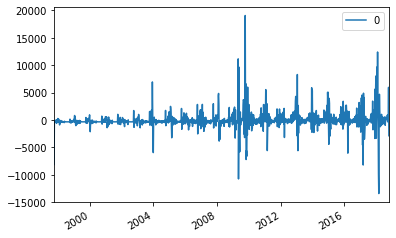

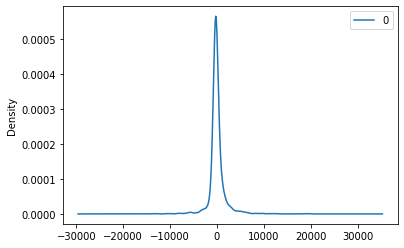

                  0
count   1098.000000
mean      -1.051309
std     1742.917067
min   -13395.759435
25%     -421.976902
50%     -227.788209
75%      218.184344
max    19055.617465


In [27]:
model1 = ARIMA(fluDatat.dropna(), order=(2,0,0)) 
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())
# plot residual errors
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()
plt.show()
residuals1.plot(kind='kde')
plt.show()
print(residuals1.describe())

### 2,1,0 Model

                             ARIMA Model Results                              
Dep. Variable:             D.ILITOTAL   No. Observations:                 1097
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -9758.719
Method:                       css-mle   S.D. of innovations           1766.358
Date:                Mon, 01 Mar 2021   AIC                          19525.439
Time:                        23:18:03   BIC                          19545.440
Sample:                             1   HQIC                         19533.006
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.4831    129.693      0.127      0.899    -237.711     270.678
ar.L1.D.ILITOTAL     0.6333      0.030     20.979      0.000       0.574       0.692
ar.L2.D.ILITOTAL    -0.0440 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


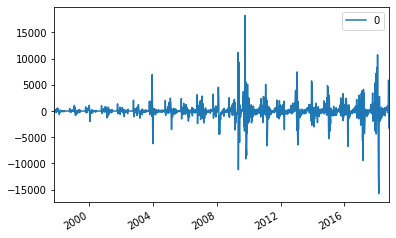

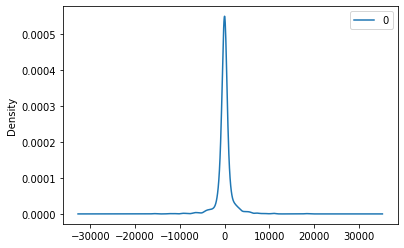

                  0
count   1097.000000
mean       0.107036
std     1767.163357
min   -15754.809899
25%     -338.127067
50%       -6.769783
75%      291.403745
max    18227.725079


In [28]:
model2 = ARIMA(fluDatat.dropna(), order=(2,1,0)) # MS stands for 'Month Start' in time series frequencies
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())
# plot residual errors
residuals2 = pd.DataFrame(model2_fit.resid)
residuals2.plot()
plt.show()
residuals2.plot(kind='kde')
plt.show()
print(residuals2.describe())

### Summary Comparison : 2,0,0 vs. 2,1,0

* Very small difference observed

### Brute force search for best ARIMA Model

343742.6120142932


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


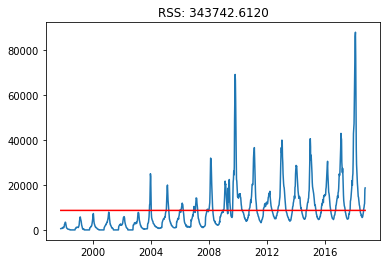

0 0 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


187705.11211344946


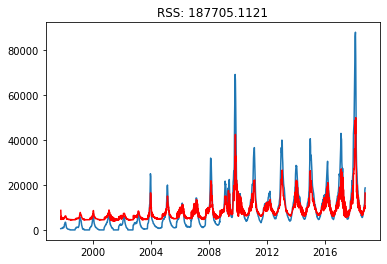

0 0 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


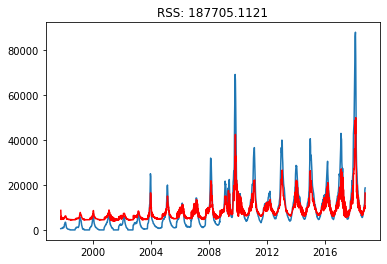

0 0 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


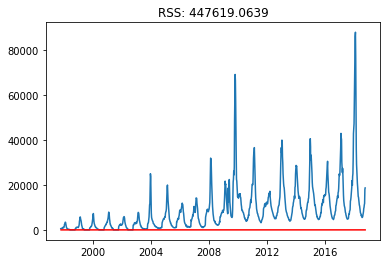

0 1 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


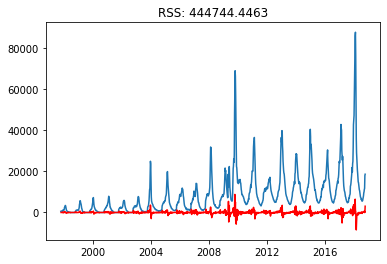

0 1 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


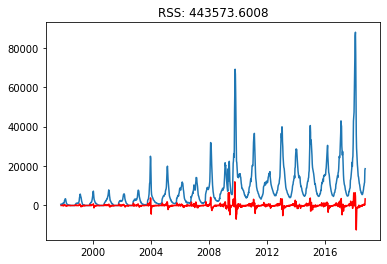

0 1 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


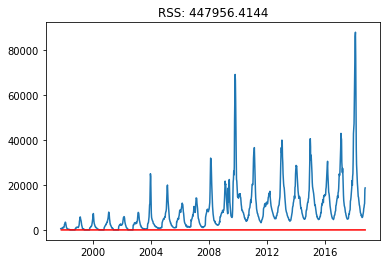

0 2 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


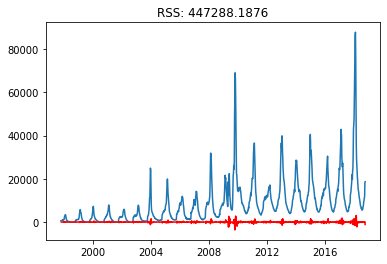

0 2 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


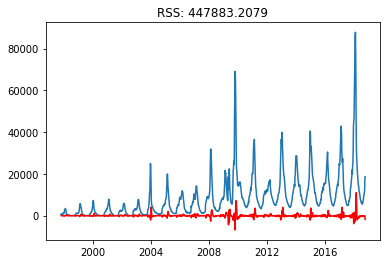

0 2 2
73725.2105289666


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


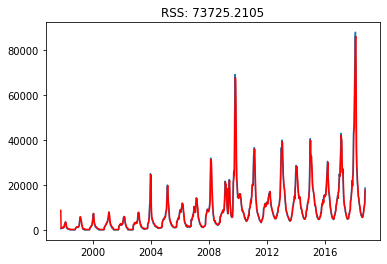

1 0 0
62221.42280217755

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


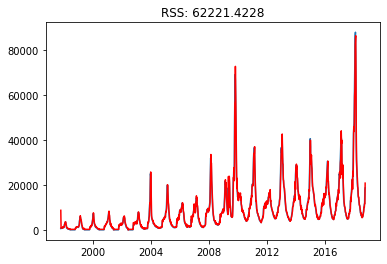

1 0 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


59002.59138985385


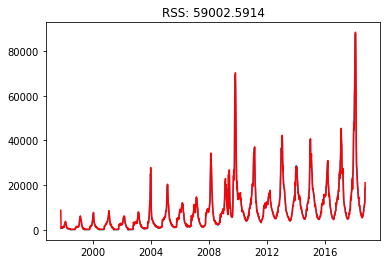

1 0 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


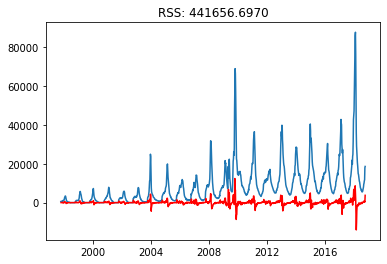

1 1 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


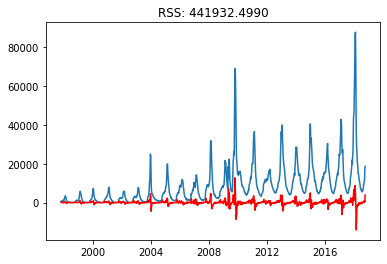

1 1 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


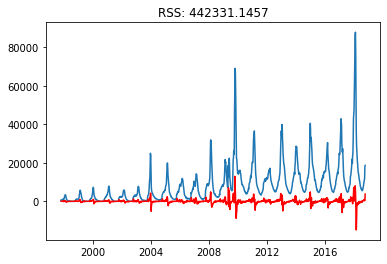

1 1 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


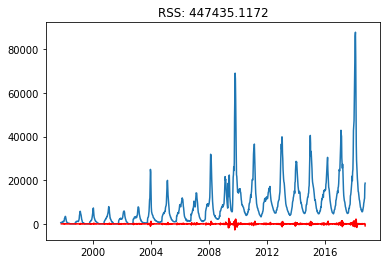

1 2 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


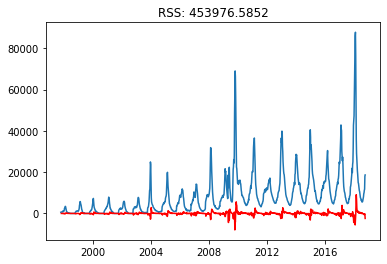

1 2 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


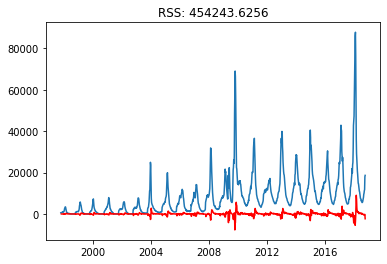

1 2 2
57727.14982578733


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


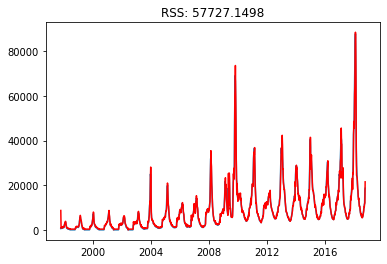

2 0 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


57726.893553369715


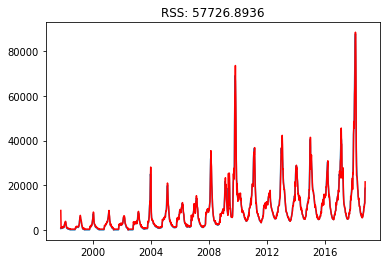

2 0 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


57463.93251173019


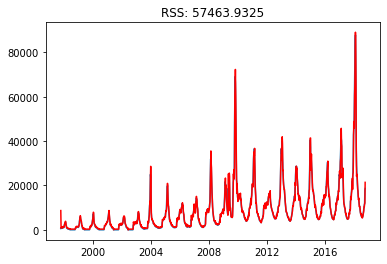

2 0 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


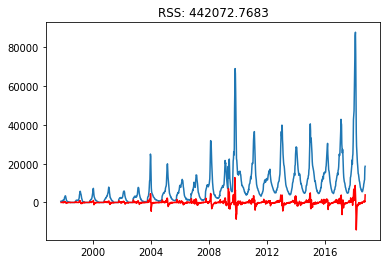

2 1 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


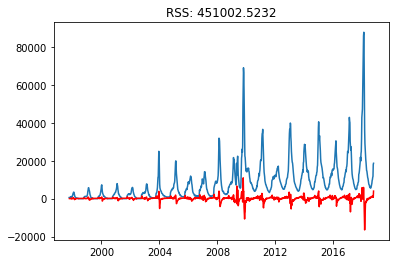

2 1 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


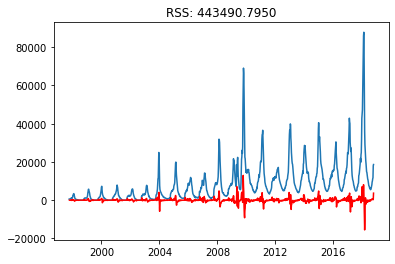

2 1 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


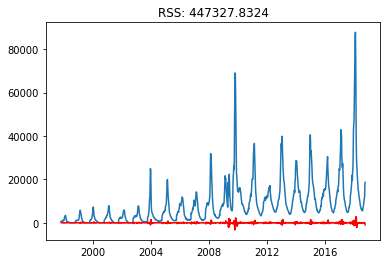

2 2 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


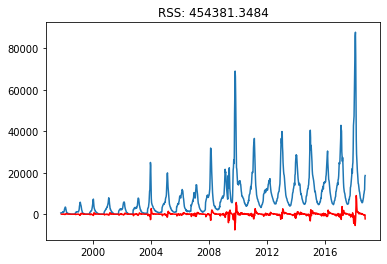

2 2 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


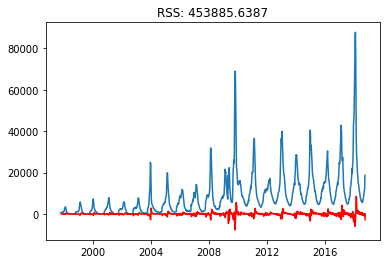

2 2 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


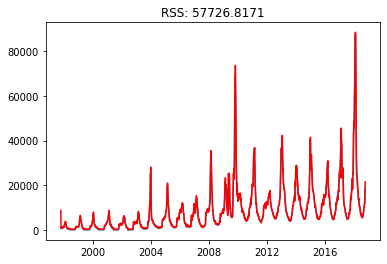

3 0 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


57406.15485250977


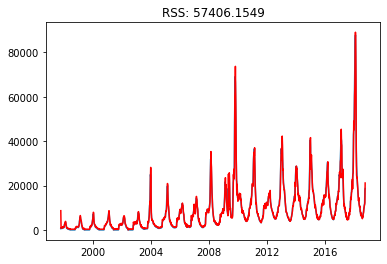

3 0 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


57343.345346505885


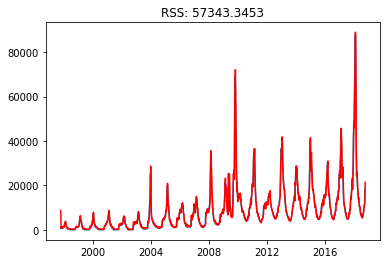

3 0 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


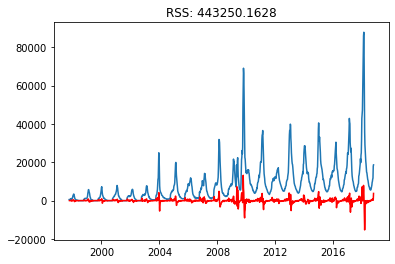

3 1 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


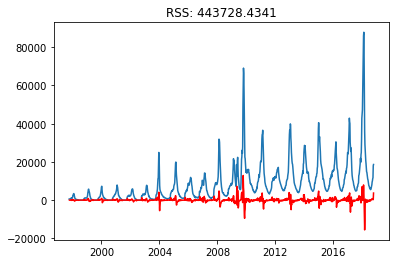

3 1 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


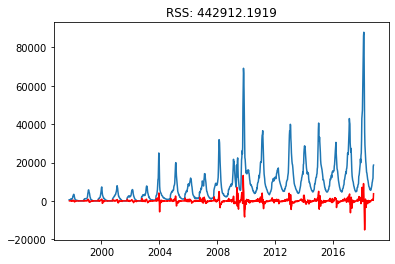

3 1 2


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


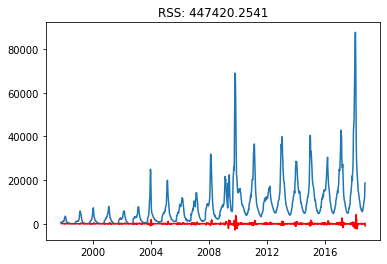

3 2 0


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


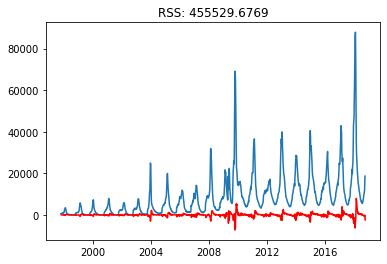

3 2 1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


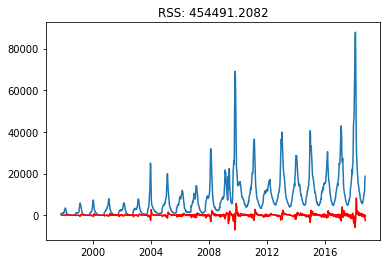

3 2 2


In [29]:
fluDatat_f = fluDatat.astype(float)
loss_best = 1E16
best_ints = [-1,-1,-1]
sum_mat = []

for p in range(4):
    for d in range(3):
        for q in range(3):
            model = ARIMA(fluDatat_f.dropna(), order=(p, d, q))  
            try:
                results_ARIMA = model.fit(disp=-1)
            except ValueError:
                pass
            except:
                pass
            plt.plot(fluDatat_f)
            plt.plot(results_ARIMA.fittedvalues, color='red')
            x=pd.DataFrame(results_ARIMA.fittedvalues)
            x=x.join(fluDatat_f)
            x['out']=(x.iloc[:,0]-x.iloc[:,1])**2
            loss=np.sqrt(x['out'].sum())
            plt.title('RSS: %.4f'% loss)
            if loss < loss_best:
                print(loss)
                loss_best = loss
                best_ints=[p,d,q]
            plt.show()
            print(p,d,q)
            sum_mat.append([p, d, q, loss])

df_sum = pd.DataFrame(sum_mat, columns=["p", "d","q","loss"])

In [30]:
print(loss_best)
print(best_ints)
df_sum.sort_values(by = 'loss',ascending=True)

57343.345346505885
[3, 0, 2]


,p,d,q,loss
29,3,0,2,57343.345347
28,3,0,1,57406.154853
20,2,0,2,57463.932512
27,3,0,0,57726.817074
19,2,0,1,57726.893553
18,2,0,0,57727.149826
11,1,0,2,59002.591390
10,1,0,1,62221.422802
9,1,0,0,73725.210529
2,0,0,2,187705.112113


**Is this the best answer?  Why or why not?**

No, it violates RULES 8.  With an AR (p) of 3, your MA (q) must be 1 or 0.  You might need to write a function to eliminate these scenarios from your "best" list.

## Prediction

### Model 2,0,0

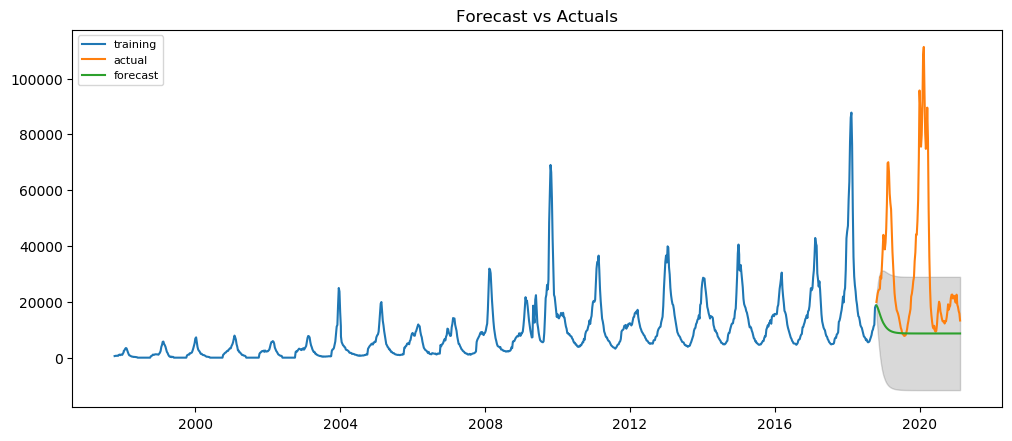

In [31]:
fc, se, conf = model_fit1.forecast(122, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=fluDatav.index)
lower_series = pd.Series(conf[:, 0], index=fluDatav.index)
upper_series = pd.Series(conf[:, 1], index=fluDatav.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fluDatat, label='training')
plt.plot(fluDatav, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [34]:
import statsmodels.api as sm

smodel1 = sm.tsa.statespace.SARIMAX(fluDatat.dropna(), order=(2,1,1),trend='n',seasonal_order=(2,1,1,52)) 
smodel_fit1 = smodel1.fit(disp=0)
print(smodel_fit1.summary())


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           ILITOTAL   No. Observations:                 1098
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 52)   Log Likelihood               -9290.721
Date:                            Mon, 01 Mar 2021   AIC                          18595.442
Time:                                    23:34:03   BIC                          18630.104
Sample:                                         0   HQIC                         18608.588
                                           - 1098                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5221      0.013    120.555      0.000       1.497       1.547
ar.L2         -0.5936      0.012   

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


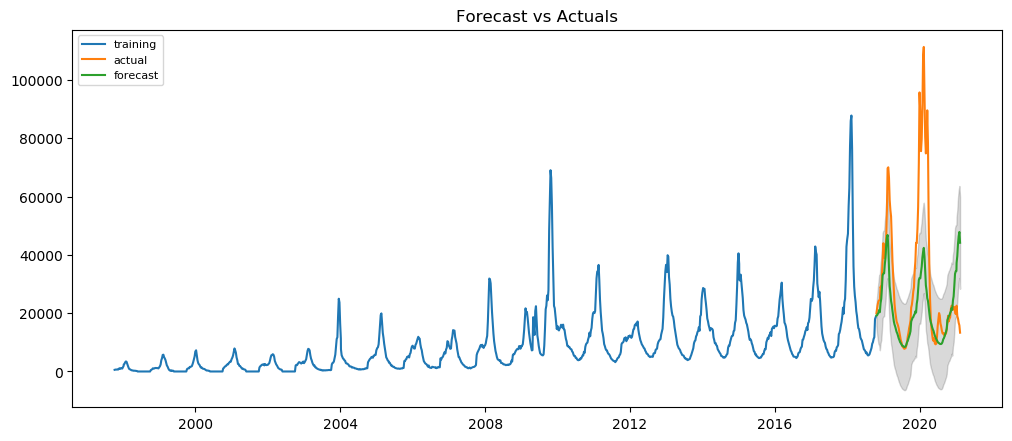

In [35]:
pred = smodel_fit1.get_forecast(steps=122)
pred_ci = pred.conf_int()

sfc_series = pd.Series(pred.summary_frame()['mean'].values, index=fluDatav.index)
slower_series = pd.Series(pred_ci.iloc[:,0].values, index=fluDatav.index)
supper_series = pd.Series(pred_ci.iloc[:,1].values, index=fluDatav.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fluDatat, label='training')
plt.plot(fluDatav, label='actual')
plt.plot(sfc_series, label='forecast')
plt.fill_between(slower_series.index, slower_series, supper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ax = y['2015':].plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Retail_sold')
# plt.legend()
# plt.show()